In [741]:
import csv
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
import blaze as bz

In [742]:
# Polynomial Regression
def polyfit(x, y, degree):
    results = {}
    coeffs = numpy.polyfit(x, y, degree)
     # Polynomial Coefficients
    results['polynomial'] = coeffs.tolist()
    # r-squared
    p = numpy.poly1d(coeffs)
    # fit values, and mean
    yhat = p(x)                         # or [p(z) for z in x]
    ybar = numpy.sum(y)/len(y)          # or sum(y)/len(y)
    ssreg = numpy.sum((yhat-ybar)**2)   # or sum([ (yihat - ybar)**2 for yihat in yhat])
    sstot = numpy.sum((y - ybar)**2)    # or sum([ (yi - ybar)**2 for yi in y])
    results['determination'] = ssreg / sstot
    return results

In [743]:
file = os.path.join('data', 'Fielding.csv')
fielding = pd.read_csv(file)
fielding.head()

,playerID,yearID,stint,teamID,lgID,POS,G,GS,InnOuts,PO,A,E,DP,PB,WP,SB,CS,ZR
0,abercda01,1871,1,TRO,NaN,SS,1,1.0,24.0,1,3,2.0,0,NaN,NaN,NaN,NaN,NaN
1,addybo01,1871,1,RC1,NaN,2B,22,22.0,606.0,67,72,42.0,5,NaN,NaN,NaN,NaN,NaN
2,addybo01,1871,1,RC1,NaN,SS,3,3.0,96.0,8,14,7.0,0,NaN,NaN,NaN,NaN,NaN
3,allisar01,1871,1,CL1,NaN,2B,2,0.0,18.0,1,4,0.0,0,NaN,NaN,NaN,NaN,NaN
4,allisar01,1871,1,CL1,NaN,OF,29,29.0,729.0,51,3,7.0,1,NaN,NaN,NaN,NaN,NaN


In [744]:
file = os.path.join('data', 'People.csv')
people = pd.read_csv(file)
people.head()

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,...,Aardsma,David Allan,215.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01
1,aaronha01,1934.0,2.0,5.0,USA,AL,Mobile,NaN,NaN,NaN,...,Aaron,Henry Louis,180.0,72.0,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01
2,aaronto01,1939.0,8.0,5.0,USA,AL,Mobile,1984.0,8.0,16.0,...,Aaron,Tommie Lee,190.0,75.0,R,R,1962-04-10,1971-09-26,aarot101,aaronto01
3,aasedo01,1954.0,9.0,8.0,USA,CA,Orange,NaN,NaN,NaN,...,Aase,Donald William,190.0,75.0,R,R,1977-07-26,1990-10-03,aased001,aasedo01
4,abadan01,1972.0,8.0,25.0,USA,FL,Palm Beach,NaN,NaN,NaN,...,Abad,Fausto Andres,184.0,73.0,L,L,2001-09-10,2006-04-13,abada001,abadan01


In [745]:
merge_data = pd.merge(fielding,people[['playerID','birthYear']],on='playerID', how='left')
merge_data.head()

,playerID,yearID,stint,teamID,lgID,POS,G,GS,InnOuts,PO,A,E,DP,PB,WP,SB,CS,ZR,birthYear
0,abercda01,1871,1,TRO,NaN,SS,1,1.0,24.0,1,3,2.0,0,NaN,NaN,NaN,NaN,NaN,1850.0
1,addybo01,1871,1,RC1,NaN,2B,22,22.0,606.0,67,72,42.0,5,NaN,NaN,NaN,NaN,NaN,1842.0
2,addybo01,1871,1,RC1,NaN,SS,3,3.0,96.0,8,14,7.0,0,NaN,NaN,NaN,NaN,NaN,1842.0
3,allisar01,1871,1,CL1,NaN,2B,2,0.0,18.0,1,4,0.0,0,NaN,NaN,NaN,NaN,NaN,1849.0
4,allisar01,1871,1,CL1,NaN,OF,29,29.0,729.0,51,3,7.0,1,NaN,NaN,NaN,NaN,NaN,1849.0


In [746]:
clean_df = merge_data[merge_data.yearID > 1899]
clean_df.head(10)

,playerID,yearID,stint,teamID,lgID,POS,G,GS,InnOuts,PO,A,E,DP,PB,WP,SB,CS,ZR,birthYear
14691,allenbo01,1900,1,CIN,NL,SS,5,NaN,93.0,6,13,3.0,1,NaN,NaN,NaN,NaN,NaN,1867.0
14692,baileha01,1900,1,BSN,NL,P,4,NaN,60.0,1,8,0.0,0,NaN,NaN,NaN,NaN,NaN,1876.0
14693,barreji01,1900,1,CIN,NL,OF,137,NaN,3561.0,287,25,24.0,6,NaN,NaN,NaN,NaN,NaN,1875.0
14694,barrysh01,1900,1,BSN,NL,1B,10,NaN,270.0,103,2,4.0,5,NaN,NaN,NaN,NaN,NaN,1878.0
14695,barrysh01,1900,1,BSN,NL,2B,16,NaN,327.0,32,22,9.0,5,NaN,NaN,NaN,NaN,NaN,1878.0
14696,barrysh01,1900,1,BSN,NL,3B,1,NaN,18.0,0,2,1.0,0,NaN,NaN,NaN,NaN,NaN,1878.0
14697,barrysh01,1900,1,BSN,NL,OF,24,NaN,567.0,39,4,2.0,2,NaN,NaN,NaN,NaN,NaN,1878.0
14698,barrysh01,1900,1,BSN,NL,SS,18,NaN,387.0,25,52,7.0,1,NaN,NaN,NaN,NaN,NaN,1878.0
14699,beaumgi01,1900,1,PIT,NL,OF,138,NaN,3618.0,274,10,17.0,3,NaN,NaN,NaN,NaN,NaN,1876.0
14700,becklja01,1900,1,CIN,NL,1B,140,NaN,3675.0,1389,93,30.0,91,NaN,NaN,NaN,NaN,NaN,1867.0


In [747]:
clean_df['age'] = clean_df['yearID']-clean_df['birthYear']
clean_df = clean_df[clean_df.age < 43]
clean_df.head(10)

C:\Users\alexb\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,playerID,yearID,stint,teamID,lgID,POS,G,GS,InnOuts,PO,A,E,DP,PB,WP,SB,CS,ZR,birthYear,age
14691,allenbo01,1900,1,CIN,NL,SS,5,NaN,93.0,6,13,3.0,1,NaN,NaN,NaN,NaN,NaN,1867.0,33.0
14692,baileha01,1900,1,BSN,NL,P,4,NaN,60.0,1,8,0.0,0,NaN,NaN,NaN,NaN,NaN,1876.0,24.0
14693,barreji01,1900,1,CIN,NL,OF,137,NaN,3561.0,287,25,24.0,6,NaN,NaN,NaN,NaN,NaN,1875.0,25.0
14694,barrysh01,1900,1,BSN,NL,1B,10,NaN,270.0,103,2,4.0,5,NaN,NaN,NaN,NaN,NaN,1878.0,22.0
14695,barrysh01,1900,1,BSN,NL,2B,16,NaN,327.0,32,22,9.0,5,NaN,NaN,NaN,NaN,NaN,1878.0,22.0
14696,barrysh01,1900,1,BSN,NL,3B,1,NaN,18.0,0,2,1.0,0,NaN,NaN,NaN,NaN,NaN,1878.0,22.0
14697,barrysh01,1900,1,BSN,NL,OF,24,NaN,567.0,39,4,2.0,2,NaN,NaN,NaN,NaN,NaN,1878.0,22.0
14698,barrysh01,1900,1,BSN,NL,SS,18,NaN,387.0,25,52,7.0,1,NaN,NaN,NaN,NaN,NaN,1878.0,22.0
14699,beaumgi01,1900,1,PIT,NL,OF,138,NaN,3618.0,274,10,17.0,3,NaN,NaN,NaN,NaN,NaN,1876.0,24.0
14700,becklja01,1900,1,CIN,NL,1B,140,NaN,3675.0,1389,93,30.0,91,NaN,NaN,NaN,NaN,NaN,1867.0,33.0


In [748]:
# q_ref = 0.29  # the reference Q value for a significance level of 95% and 30 data points

# # games_list = clean_df['G'].tolist()
# # games_list = sorted(games_list)
# age_list = clean_df['age'].tolist()
# counts(age_list)

# q_stat = (games_list[1] - games_list[0])/(games_list[-1] - games_list[0])
# if q_stat > q_ref:
#     print(games_list[0])
# else:
#      pass
    

In [749]:
clean_df = clean_df[clean_df.G > 90]
clean_df = clean_df[clean_df.POS != 'P']
clean_df.head()

,playerID,yearID,stint,teamID,lgID,POS,G,GS,InnOuts,PO,A,E,DP,PB,WP,SB,CS,ZR,birthYear,age
14693,barreji01,1900,1,CIN,NL,OF,137,NaN,3561.0,287,25,24.0,6,NaN,NaN,NaN,NaN,NaN,1875.0,25.0
14699,beaumgi01,1900,1,PIT,NL,OF,138,NaN,3618.0,274,10,17.0,3,NaN,NaN,NaN,NaN,NaN,1876.0,24.0
14700,becklja01,1900,1,CIN,NL,1B,140,NaN,3675.0,1389,93,30.0,91,NaN,NaN,NaN,NaN,NaN,1867.0,33.0
14707,bradlbi01,1900,1,CHN,NL,3B,106,NaN,2835.0,164,291,61.0,11,NaN,NaN,NaN,NaN,NaN,1878.0,22.0
14713,burkeje01,1900,1,SLN,NL,OF,141,NaN,3639.0,337,17,25.0,6,NaN,NaN,NaN,NaN,NaN,1868.0,32.0


In [750]:
# clean_df.count()

In [751]:
fielding_data = clean_df.drop(columns=['ZR', 'CS', 'SB', 'WP', 'PB', 'stint', 'GS', 'teamID', 'lgID'])
fielding_data.head()

,playerID,yearID,POS,G,InnOuts,PO,A,E,DP,birthYear,age
14693,barreji01,1900,OF,137,3561.0,287,25,24.0,6,1875.0,25.0
14699,beaumgi01,1900,OF,138,3618.0,274,10,17.0,3,1876.0,24.0
14700,becklja01,1900,1B,140,3675.0,1389,93,30.0,91,1867.0,33.0
14707,bradlbi01,1900,3B,106,2835.0,164,291,61.0,11,1878.0,22.0
14713,burkeje01,1900,OF,141,3639.0,337,17,25.0,6,1868.0,32.0


In [752]:
fielding_data['Range Factor'] = (fielding_data['PO']+fielding_data['A'])/fielding_data['G']
fielding_data.head()
fielding_data['POS'].value_counts()

OF    6637
SS    2132
1B    2052
2B    2003
3B    1948
C     1746
Name: POS, dtype: int64

In [753]:
position_df = fielding_data.sort_values('POS')
position_df.head()
# position_df['G'].value_counts()

,playerID,yearID,POS,G,InnOuts,PO,A,E,DP,birthYear,age,Range Factor
58898,cepedor01,1963,1B,150,3902.0,1262,83,21.0,91,1937.0,26.0,8.966667
88631,esaskni01,1988,1B,116,2860.0,982,52,6.0,70,1960.0,28.0,8.913793
113137,spiezsc01,2003,1B,114,2374.0,722,57,5.0,61,1972.0,31.0,6.833333
44090,mcquige02,1943,1B,122,NaN,1072,86,9.0,88,1910.0,33.0,9.491803
77315,lacocpe01,1979,1B,108,2448.0,829,68,3.0,79,1952.0,27.0,8.305556


In [754]:
position_df['Fielding %'] = (position_df['PO']+position_df['A'])/(position_df['PO']+position_df['A']+position_df['E']) * 100
position_df.head()

,playerID,yearID,POS,G,InnOuts,PO,A,E,DP,birthYear,age,Range Factor,Fielding %
58898,cepedor01,1963,1B,150,3902.0,1262,83,21.0,91,1937.0,26.0,8.966667,98.462665
88631,esaskni01,1988,1B,116,2860.0,982,52,6.0,70,1960.0,28.0,8.913793,99.423077
113137,spiezsc01,2003,1B,114,2374.0,722,57,5.0,61,1972.0,31.0,6.833333,99.362245
44090,mcquige02,1943,1B,122,NaN,1072,86,9.0,88,1910.0,33.0,9.491803,99.228792
77315,lacocpe01,1979,1B,108,2448.0,829,68,3.0,79,1952.0,27.0,8.305556,99.666667


In [755]:
year_df = position_df.groupby('yearID').mean()
rf_avg = year_df['Range Factor'].tolist()
fp_avg = year_df['Fielding %'].tolist()
rf_year = year_df.index.tolist()
fp_year = year_df.index.tolist()
RF_Yearly_Avg = []
fp_yearly_avg = []
for index, row in position_df.iterrows():
    year = row['yearID']
    rf_index = rf_year.index(year)
    RF_Yearly_Avg.append(float(rf_avg[rf_index]))
    fp_index = fp_year.index(year)
    fp_yearly_avg.append(float(fp_avg[fp_index]))
position_df['RF Yearly Avg'] = RF_Yearly_Avg
position_df['FP Yearly Avg'] = fp_yearly_avg
position_df.head()
# position_df.to_csv('Fielding Output/final_data.csv')

,playerID,yearID,POS,G,InnOuts,PO,A,E,DP,birthYear,age,Range Factor,Fielding %,RF Yearly Avg,FP Yearly Avg
58898,cepedor01,1963,1B,150,3902.0,1262,83,21.0,91,1937.0,26.0,8.966667,98.462665,4.105809,97.672047
88631,esaskni01,1988,1B,116,2860.0,982,52,6.0,70,1960.0,28.0,8.913793,99.423077,4.016193,97.842858
113137,spiezsc01,2003,1B,114,2374.0,722,57,5.0,61,1972.0,31.0,6.833333,99.362245,4.172662,98.237829
44090,mcquige02,1943,1B,122,NaN,1072,86,9.0,88,1910.0,33.0,9.491803,99.228792,4.526145,97.378974
77315,lacocpe01,1979,1B,108,2448.0,829,68,3.0,79,1952.0,27.0,8.305556,99.666667,4.113890,97.738265


In [756]:
position_df['Range Factor Difference'] = position_df['Range Factor'] - position_df['RF Yearly Avg']
position_df['Fielding % Difference'] = position_df['Fielding %'] - position_df['FP Yearly Avg']
rf_grouped = position_df.groupby('age').mean().reset_index()
rf_grouped.head()
rf_grouped.to_csv('Fielding Output/age_means.csv')


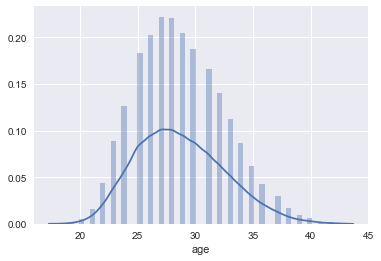

In [757]:
# Age Spread
sns.distplot(position_df['age'])
plt.savefig('Fielding Output/age_dist.png')

In [758]:
OF_df = position_df[position_df.POS == 'OF']
OF_grouped = OF_df.groupby(['age']).mean().reset_index()

first_df = position_df[position_df.POS == '1B']
first_grouped = first_df.groupby(['age']).mean().reset_index()

second_df = position_df[position_df.POS == '2B']
second_grouped = second_df.groupby(['age']).mean().reset_index()

third_df = position_df[position_df.POS == '3B']
third_grouped = third_df.groupby(['age']).mean().reset_index()

SS_df = position_df[position_df.POS == 'SS']
SS_grouped = SS_df.groupby(['age']).mean().reset_index()

C_df = position_df[position_df.POS == 'C']
C_grouped = C_df.groupby(['age']).mean().reset_index()

position_groupby = position_df.groupby(['age', 'POS']).mean().reset_index()
OF_grouped.head()

,age,yearID,G,InnOuts,PO,A,E,DP,birthYear,Range Factor,Fielding %,RF Yearly Avg,FP Yearly Avg,Range Factor Difference,Fielding % Difference
0,19.0,1948.000000,104.666667,2675.000000,212.000000,10.666667,6.000000,2.333333,1929.000000,2.157488,97.360111,4.336842,97.438485,-2.179353,-0.078374
1,20.0,1953.076923,125.538462,3320.111111,281.769231,13.769231,8.923077,2.846154,1933.076923,2.360072,96.834269,4.216515,97.084185,-1.856443,-0.249916
2,21.0,1959.561404,126.894737,3120.444444,263.438596,11.333333,8.087719,2.824561,1938.561404,2.151064,97.015462,4.199860,97.296435,-2.048796,-0.280973
3,22.0,1962.309524,131.222222,3287.512500,280.817460,11.690476,7.777778,2.269841,1940.309524,2.205484,97.333078,4.196674,97.395014,-1.991190,-0.061937
4,23.0,1965.467681,127.406844,3156.762431,269.996198,10.703422,7.083650,2.311787,1942.467681,2.190237,97.463803,4.188260,97.444687,-1.998023,0.019116


In [759]:
# sns.boxplot(x='age',y='Range Factor', data=position_df, hue='POS', ax=ax)

# a4_dims = (11.7, 8.27)
# df = firstbase_df
# fig, ax = plt.subplots(figsize=a4_dims)
# sns.boxplot(x='age',y='Range Factor', data=df, ax=ax)

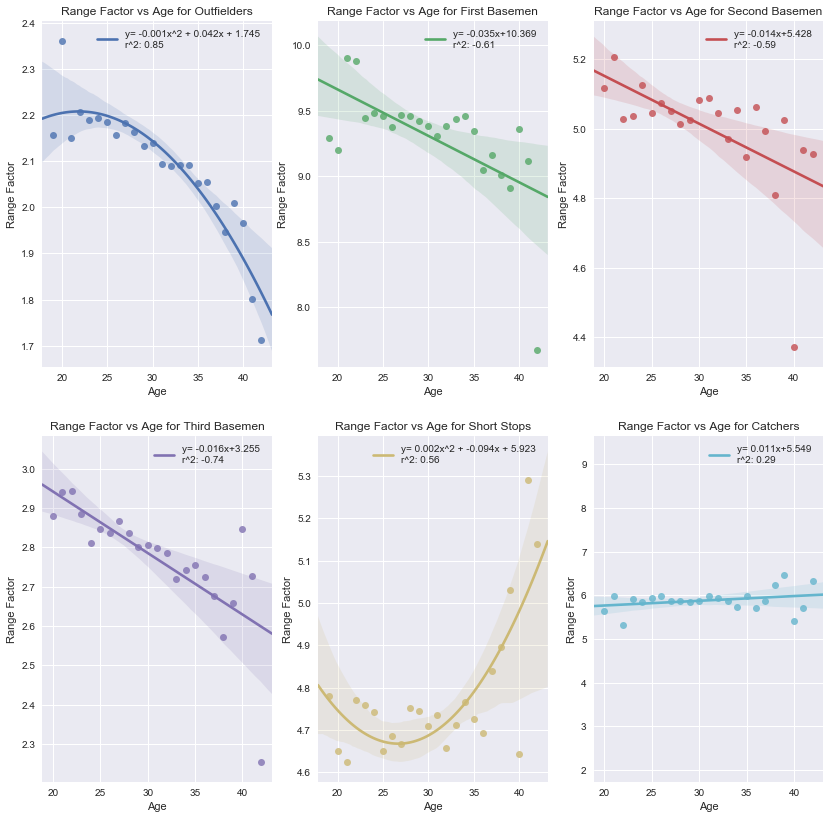

In [760]:
# a4_dims = (3.67, 4.125)

# slope, intercept, r_value, p_value, std_err = stats.linregress(OF_grouped['age'],OF_grouped['Range Factor'])
# fig, ax = plt.subplots(figsize=a4_dims)
# sns.regplot(x='age',y='Range Factor', data=OF_grouped, ax=ax, line_kws={'label':"y={0:.2f}x+{1:.2f}".format(slope,intercept)})
# plt.title('Range Factor vs Age for Outfielders')
# ax.legend()

# # np.polyfit
# fig, ax = plt.subplots(figsize=a4_dims)
# sns.regplot(x='age',y='Range Factor', data=first_grouped, ax=ax, order=3)
# plt.title('Range Factor vs Age for First Basemen')

# fig, ax = plt.subplots(figsize=a4_dims)
# sns.regplot(x='age',y='Range Factor', data=second_grouped, ax=ax)
# plt.title('Range Factor vs Age for Second Basemen')

sns.set(color_codes=True)
fig, ax= plt.subplots(2,3, figsize=(14,14))

poly = polyfit(OF_grouped['age'], OF_grouped['Range Factor'], 2)
sns.regplot(x="age", y='Range Factor', data=OF_grouped, ax=ax[0,0], order=2, line_kws={'label': """y= {0:.3f}x^2 + {1:.3f}x + {2:.3f} 
r^2: {3:.2f}""".format(poly['polynomial'][0],poly['polynomial'][1],poly['polynomial'][2],poly['determination'])})
ax[0,0].set(title='Range Factor vs Age for Outfielders', ylabel='Range Factor', xlabel='Age')
ax[0,0].legend()

slope, intercept, r_value, p_value, std_err = stats.linregress(first_grouped['age'],first_grouped['Range Factor'])
sns.regplot(x="age", y='Range Factor', data=first_grouped, ax=ax[0,1], line_kws={'label': """y= {0:.3f}x+{1:.3f} 
r^2: {2:.2f}""".format(slope,intercept,r_value)})
ax[0,1].set(title='Range Factor vs Age for First Basemen', ylabel='Range Factor', xlabel='Age')
ax[0,1].legend()

slope, intercept, r_value, p_value, std_err = stats.linregress(second_grouped['age'],second_grouped['Range Factor'])
sns.regplot(x="age", y='Range Factor', data=second_grouped, ax=ax[0,2], line_kws={'label': """y= {0:.3f}x+{1:.3f} 
r^2: {2:.2f}""".format(slope,intercept,r_value)})
ax[0,2].set(title='Range Factor vs Age for Second Basemen', ylabel='Range Factor', xlabel='Age')
ax[0,2].legend()

slope, intercept, r_value, p_value, std_err = stats.linregress(third_grouped['age'],third_grouped['Range Factor'])
sns.regplot(x="age", y='Range Factor', data=third_grouped, ax=ax[1,0], line_kws={'label': """y= {0:.3f}x+{1:.3f} 
r^2: {2:.2f}""".format(slope,intercept,r_value)})
ax[1,0].set(title='Range Factor vs Age for Third Basemen', ylabel='Range Factor', xlabel='Age')
ax[1,0].legend()

slope, intercept, r_value, p_value, std_err = stats.linregress(SS_grouped['age'],SS_grouped['Range Factor'])
poly = polyfit(SS_grouped['age'], SS_grouped['Range Factor'], 2)
sns.regplot(x="age", y='Range Factor', data=SS_grouped, ax=ax[1,1], order=2, line_kws={'label': """y= {0:.3f}x^2 + {1:.3f}x + {2:.3f} 
r^2: {3:.2f}""".format(poly['polynomial'][0],poly['polynomial'][1],poly['polynomial'][2],poly['determination'])})
ax[1,1].set(title='Range Factor vs Age for Short Stops', ylabel='Range Factor', xlabel='Age')
ax[1,1].legend()

slope, intercept, r_value, p_value, std_err = stats.linregress(C_grouped['age'],C_grouped['Range Factor'])
sns.regplot(x="age", y='Range Factor', data=C_grouped, ax=ax[1,2], line_kws={'label': """y= {0:.3f}x+{1:.3f} 
r^2: {2:.2f}""".format(slope,intercept,r_value)})
ax[1,2].set(title='Range Factor vs Age for Catchers', ylabel='Range Factor', xlabel='Age')
ax[1,2].legend()

plt.savefig('Fielding Output/reg_range_factor.png')

In [761]:
# fig, ax = plt.subplots(figsize=a4_dims)
# sns.regplot(x='age',y='Range Factor', data=third_grouped, ax=ax)
# plt.title('Range Factor vs Age for Third Basemen')

# fig, ax = plt.subplots(figsize=a4_dims)
# sns.regplot(x='age',y='Range Factor', data=SS_grouped, ax=ax)
# plt.title('Range Factor vs Age for Short Stops')

# slope, intercept, r_value, p_value, std_err = stats.linregress(C_grouped['age'],C_grouped['Range Factor'])
# fig, ax = plt.subplots(figsize=a4_dims)
# sns.regplot(x='age',y='Range Factor', data=C_grouped, ax=ax, line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
# plt.title('Range Factor vs Age for Catchers')
# ax.legend()


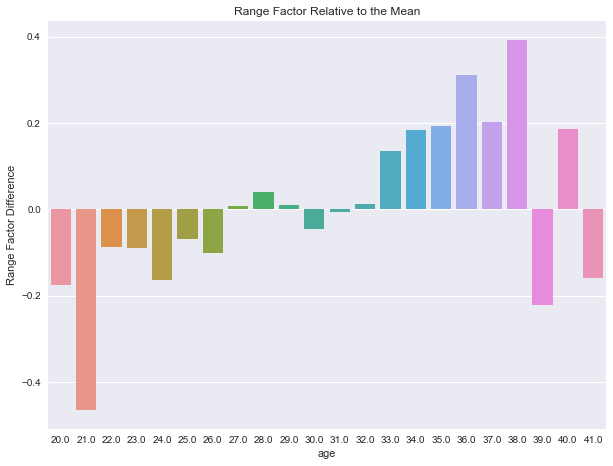

In [762]:
rf_inner = rf_grouped[rf_grouped.age < 42]
rf_inner = rf_inner[rf_inner.age > 19]
a4_dims = (10, 7.5)
df = rf_inner
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(x='age',y='Range Factor Difference', data=df, ax=ax)
plt.title('Range Factor Relative to the Mean')
plt.savefig('Fielding Output/relative.png')

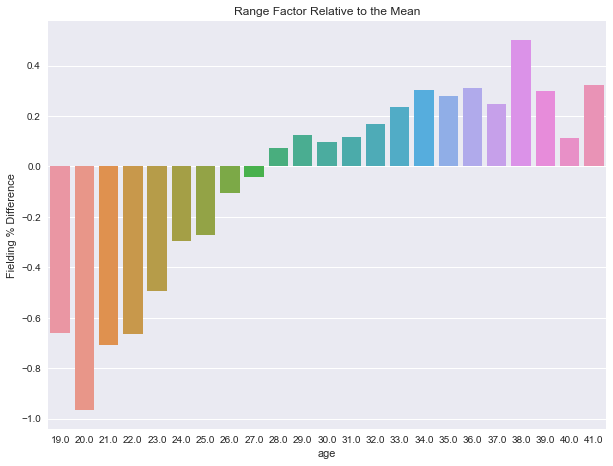

In [763]:
fp_inner = rf_grouped[rf_grouped.age < 42]
a4_dims = (10, 7.5)
df = fp_inner
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(x='age',y='Fielding % Difference', data=df, ax=ax)
plt.title('Range Factor Relative to the Mean')
plt.savefig('Fielding Output/relative_fp.png')

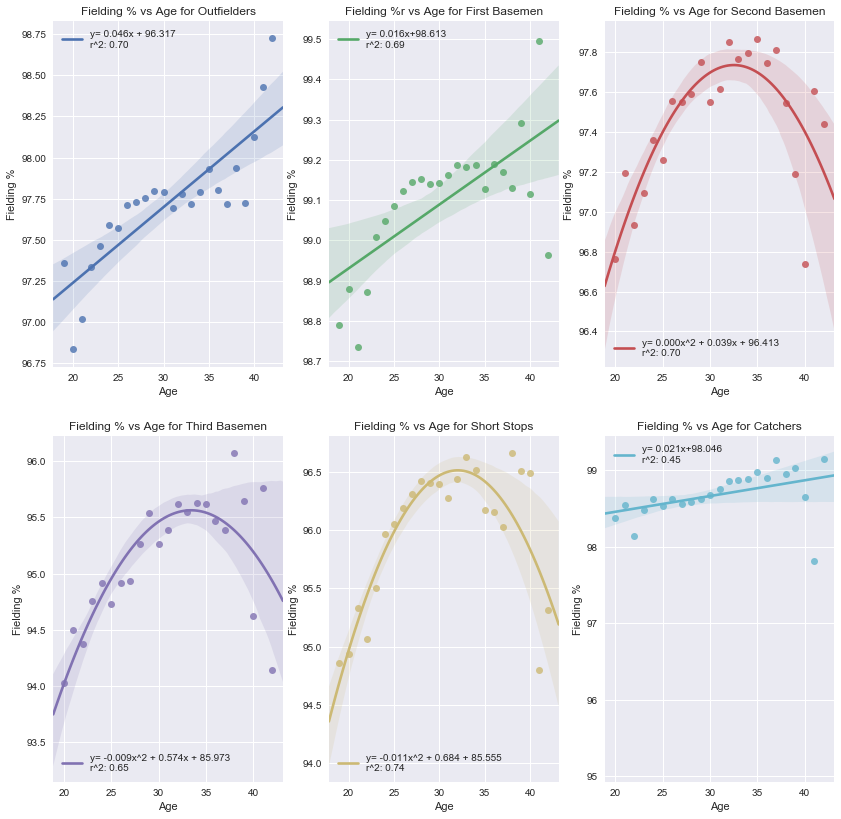

In [764]:
sns.set(color_codes=True)
fig, ax= plt.subplots(2,3, figsize=(14,14))

poly = polyfit(OF_grouped['age'], OF_grouped['Fielding %'], 1)
sns.regplot(x="age", y='Fielding %', data=OF_grouped, ax=ax[0,0], order=1, line_kws={'label': """y= {0:.3f}x + {1:.3f}
r^2: {2:.2f}""".format(poly['polynomial'][0],poly['polynomial'][1],poly['determination'])})
ax[0,0].set(title='Fielding % vs Age for Outfielders', ylabel='Fielding %', xlabel='Age')
ax[0,0].legend()

slope, intercept, r_value, p_value, std_err = stats.linregress(first_grouped['age'],first_grouped['Fielding %'])
sns.regplot(x="age", y='Fielding %', data=first_grouped, ax=ax[0,1], line_kws={'label': """y= {0:.3f}x+{1:.3f} 
r^2: {2:.2f}""".format(slope,intercept,r_value)})
ax[0,1].set(title='Fielding %r vs Age for First Basemen', ylabel='Fielding %', xlabel='Age')
ax[0,1].legend()

slope, intercept, r_value, p_value, std_err = stats.linregress(second_grouped['age'],second_grouped['Fielding %'])
poly = polyfit(OF_grouped['age'], OF_grouped['Fielding %'], 2)
sns.regplot(x="age", y='Fielding %', data=second_grouped, ax=ax[0,2], order=2, line_kws={'label': """y= {0:.3f}x^2 + {1:.3f}x + {2:.3f}  
r^2: {3:.2f}""".format(poly['polynomial'][0],poly['polynomial'][1],poly['polynomial'][2],poly['determination'])})
ax[0,2].set(title='Fielding % vs Age for Second Basemen', ylabel='Fielding %', xlabel='Age')
ax[0,2].legend()

slope, intercept, r_value, p_value, std_err = stats.linregress(third_grouped['age'],third_grouped['Fielding %'])
poly = polyfit(third_grouped['age'], third_grouped['Fielding %'], 2)
sns.regplot(x="age", y='Fielding %', data=third_grouped, ax=ax[1,0], order=2, line_kws={'label': """y= {0:.3f}x^2 + {1:.3f}x + {2:.3f}  
r^2: {3:.2f}""".format(poly['polynomial'][0],poly['polynomial'][1],poly['polynomial'][2],poly['determination'])})
ax[1,0].set(title='Fielding % vs Age for Third Basemen', ylabel='Fielding %', xlabel='Age')
ax[1,0].legend()

slope, intercept, r_value, p_value, std_err = stats.linregress(SS_grouped['age'],SS_grouped['Fielding %'])
poly = polyfit(SS_grouped['age'], SS_grouped['Fielding %'], 2)
sns.regplot(x="age", y='Fielding %', data=SS_grouped, ax=ax[1,1], order=2, line_kws={'label': """y= {0:.3f}x^2 + {1:.3f} + {2:.3f}
r^2: {3:.2f}""".format(poly['polynomial'][0],poly['polynomial'][1],poly['polynomial'][2],poly['determination'])})
ax[1,1].set(title='Fielding % vs Age for Short Stops', ylabel='Fielding %', xlabel='Age')
ax[1,1].legend()

slope, intercept, r_value, p_value, std_err = stats.linregress(C_grouped['age'],C_grouped['Fielding %'])
sns.regplot(x="age", y='Fielding %', data=C_grouped, ax=ax[1,2], line_kws={'label': """y= {0:.3f}x+{1:.3f} 
r^2: {2:.2f}""".format(slope,intercept,r_value)})
ax[1,2].set(title='Fielding % vs Age for Catchers', ylabel='Fielding %', xlabel='Age')
ax[1,2].legend()

plt.savefig('Fielding Output/reg_fielding_prct.png')


In [765]:
position_grouped = position_df.groupby('age').count()
position_grouped.head(25)

,playerID,yearID,POS,G,InnOuts,PO,A,E,DP,birthYear,Range Factor,Fielding %,RF Yearly Avg,FP Yearly Avg,Range Factor Difference,Fielding % Difference
age,,,,,,,,,,,,,,,,
19.0,8,8,8,8,3,8,8,8,8,8,8,8,8,8,8,8
20.0,36,36,36,36,21,36,36,36,36,36,36,36,36,36,36,36
21.0,120,120,120,120,73,120,120,120,120,120,120,120,120,120,120,120
22.0,329,329,329,329,197,329,329,329,329,329,329,329,329,329,329,329
23.0,672,672,672,672,439,672,672,672,672,672,672,672,672,672,672,672
24.0,963,963,963,963,669,963,963,963,963,963,963,963,963,963,963,963
25.0,1390,1390,1390,1390,954,1390,1390,1390,1390,1390,1390,1390,1390,1390,1390,1390
26.0,1542,1542,1542,1542,1060,1542,1542,1542,1542,1542,1542,1542,1542,1542,1542,1542
27.0,1687,1687,1687,1687,1144,1687,1687,1687,1687,1687,1687,1687,1687,1687,1687,1687
